# EDA on Telco Customer Churn Dataset

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## TL;DR of the EDA Analysis and Insights

### Target Variable: Churn

The churn is a binary variable indicating whether a customer has churned (1) or not (0). The churn variable is imbalanced, with a higher number of customers not churning compared to those who churned which is common in customer churn datasets. Such imbalance can affect the performance of machine learning models, so it is important to consider this in future when we are building models.

### Numerical Features

The numerical features in the dataset are `tenure`, `MonthlyCharges`, and `TotalCharges`. Here are some insights from the numerical features:

- Customers who churn tend to have lower tenure, it shows customers with longer tenure are less likely to churn.
- Monthly charge has slight upward shift for churned customers, indicating that customers who pay more monthly are slightly more likely to churn.
- TotalCharges is naturally correlated with tenure and MonthlyCharges, meaning, low TotalCharges are seen in churners due to shorter customer lifespan.

### Categorical Features

Categorical plots revealed several insights:

- Customers with a month-to-month contract churn significantly more than those with one or two-year contracts.
- Churn is higher among customers using electronic check as a payment method compared to those using automatic payment systems.
- Fiber optic internet users show higher churn than DSL users, possibly due to pricing, performance expectations, or even the complexity of switching to another provider.


### Outliers and Missing Values

- Missing TotalCharges values (11 records) were removed after converting to numeric. This is a small portion of the data (<0.2%) and should not significantly bias the results so they have been removed.
- Boxplots for numerical variables show no extreme outliers that require special handling.

### Correlation Matrix

Result of the correlation matrix shows that:

- Strong positive correlation between tenure and TotalCharges. This is naturally expected as longer tenure means more total charges.
- MonthlyCharges has a moderate positive correlation with TotalCharges, indicating that customers who pay more monthly tend to have higher total charges.
- There are no high correlations (above 0.8) that would cause concern for multicollinearity at this stage.

### Summary

The exploratory analysis helped uncover key churn-related patterns:

- Features such as tenure, Contract, PaymentMethod, and InternetService appear to be strong predictors of churn.
- Some features are imbalanced (e.g., churn), which should be handled in modeling.
- No major data quality issues remain after initial cleaning.

In [22]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv', delimiter=',')

In [23]:
df.shape

(7043, 21)

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [26]:
df.loc[df[df['TotalCharges'].isnull()].index, 'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [27]:
df = df.dropna(subset=['TotalCharges'])

In [28]:
print(df.isnull().sum())
print(df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


In [29]:
demographic_features = ["gender", "SeniorCitizen", "Partner", "Dependents"]
service_features = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                    "OnlineBackup", "DeviceProtection", "StreamingTV", "StreamingMovies", "TechSupport"]
payment_features = ["Contract", "PaperlessBilling", "PaymentMethod"]

binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']
categorical_features = list(set(service_features + payment_features) - set(binary_features))
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

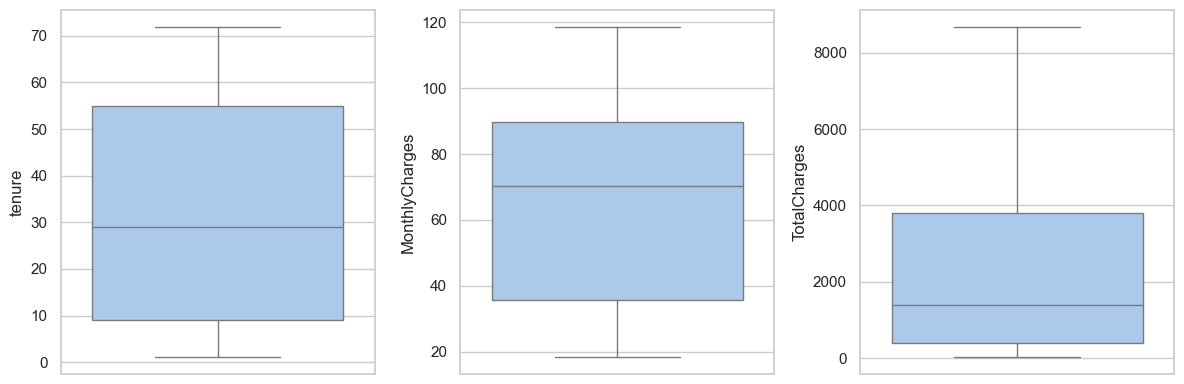

In [30]:
plt.figure(figsize=(12, 4))

for i in range(0, len(numeric_features)):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(data=df, y=numeric_features[i])
    plt.tight_layout()

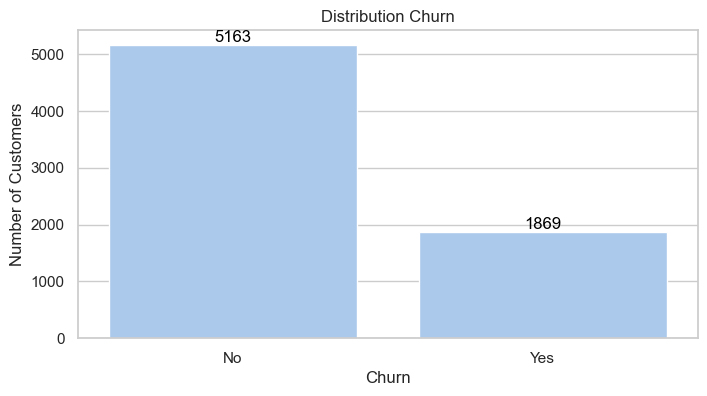

In [31]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Distribution Churn")
plt.ylabel("Number of Customers")
plt.show()

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

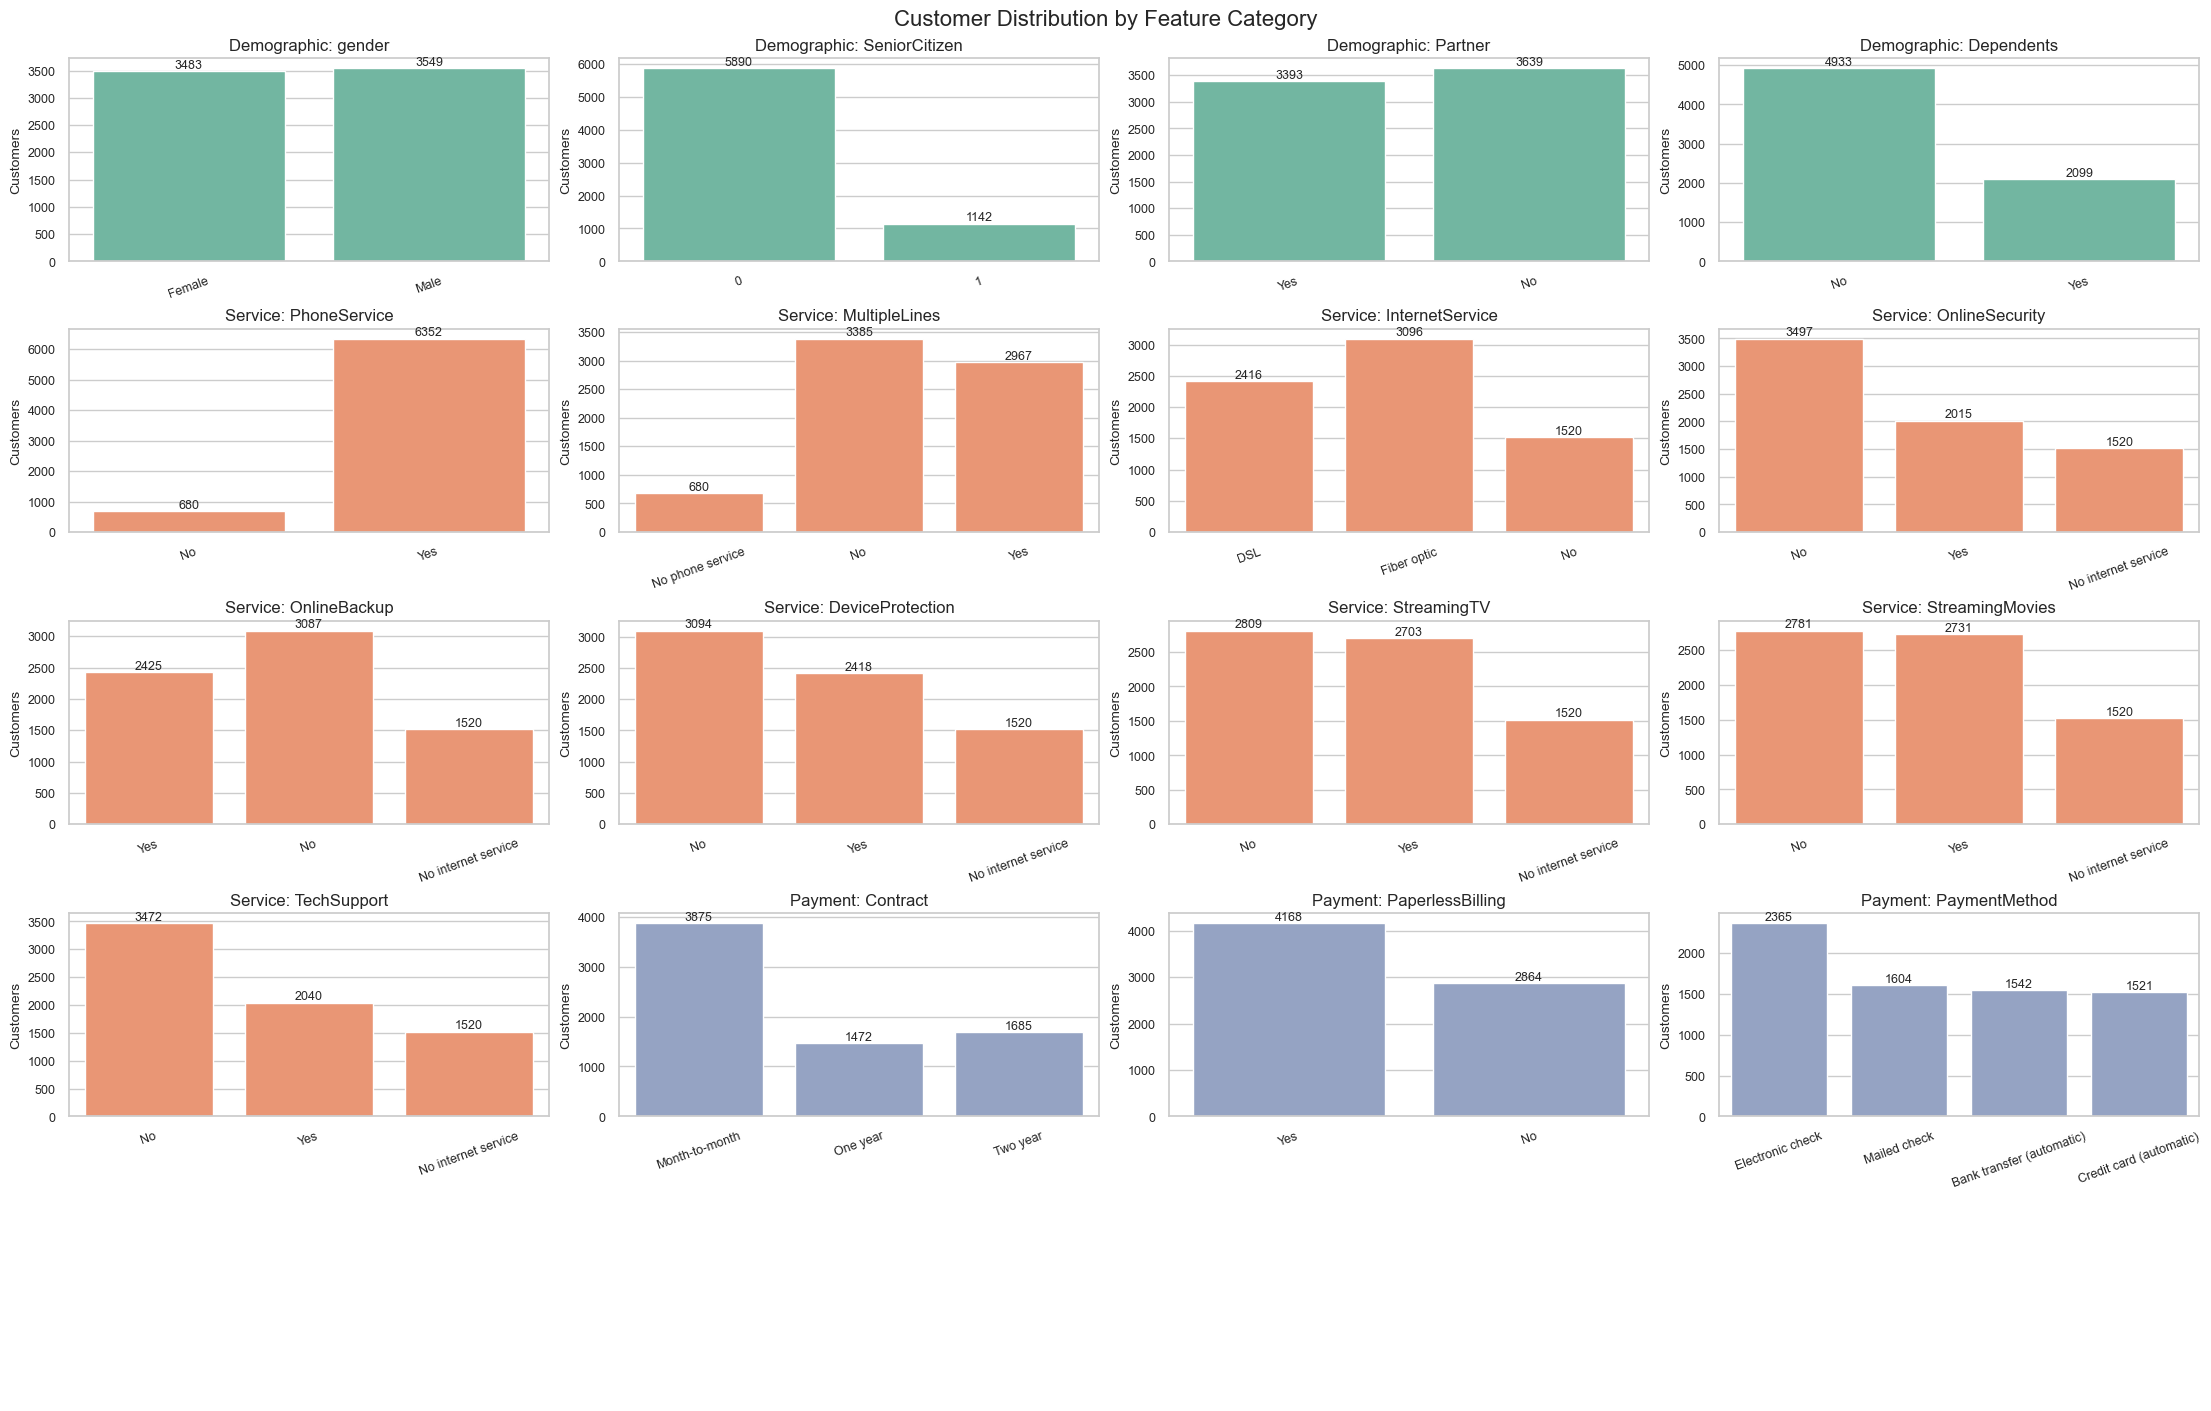

In [33]:

features = demographic_features + service_features + payment_features
feature_categories = (
    ['Demographic'] * len(demographic_features) +
    ['Service'] * len(service_features) +
    ['Payment'] * len(payment_features)
)
category_colors = {
    'Demographic': sns.color_palette("Set2")[0],
    'Service': sns.color_palette("Set2")[1],
    'Payment': sns.color_palette("Set2")[2]
}

sns.set(style="whitegrid", palette="Set2")  # Set overall style

# Layout setup
n_rows = 5
n_cols = (len(features) + n_rows - 1) // n_rows
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22, 14), constrained_layout=True)
axes = axes.flatten()

# Plot with beautification
for i, feature in enumerate(features):
    ax = axes[i]
    category = feature_categories[i]
    sns.countplot(x=df[feature], ax=ax, color=category_colors[category])
    ax.bar_label(ax.containers[0], fontsize=9)
    ax.set_title(f"{feature_categories[i]}: {feature}", fontsize=12)
    ax.set_ylabel("Customers", fontsize=10)
    ax.set_xlabel("", fontsize=10)
    ax.tick_params(axis='x', labelrotation=20, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

# Hide unused axes
for j in range(len(features), len(axes)):
    axes[j].axis('off')

fig.suptitle("Customer Distribution by Feature Category", fontsize=16)
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

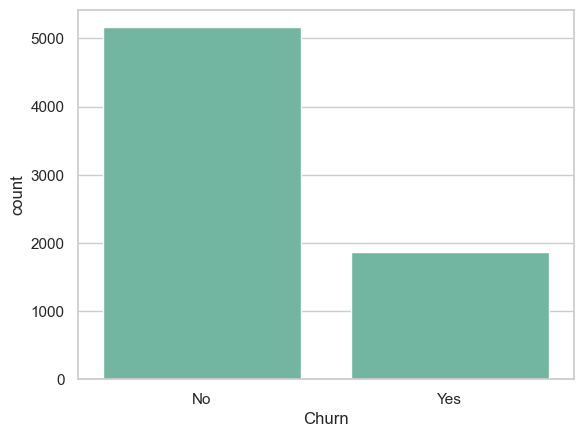

In [34]:
sns.countplot(x='Churn', data=df)

<Axes: >

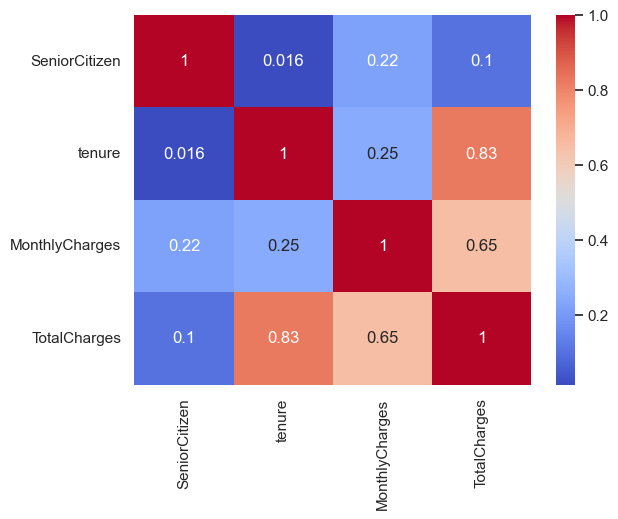

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

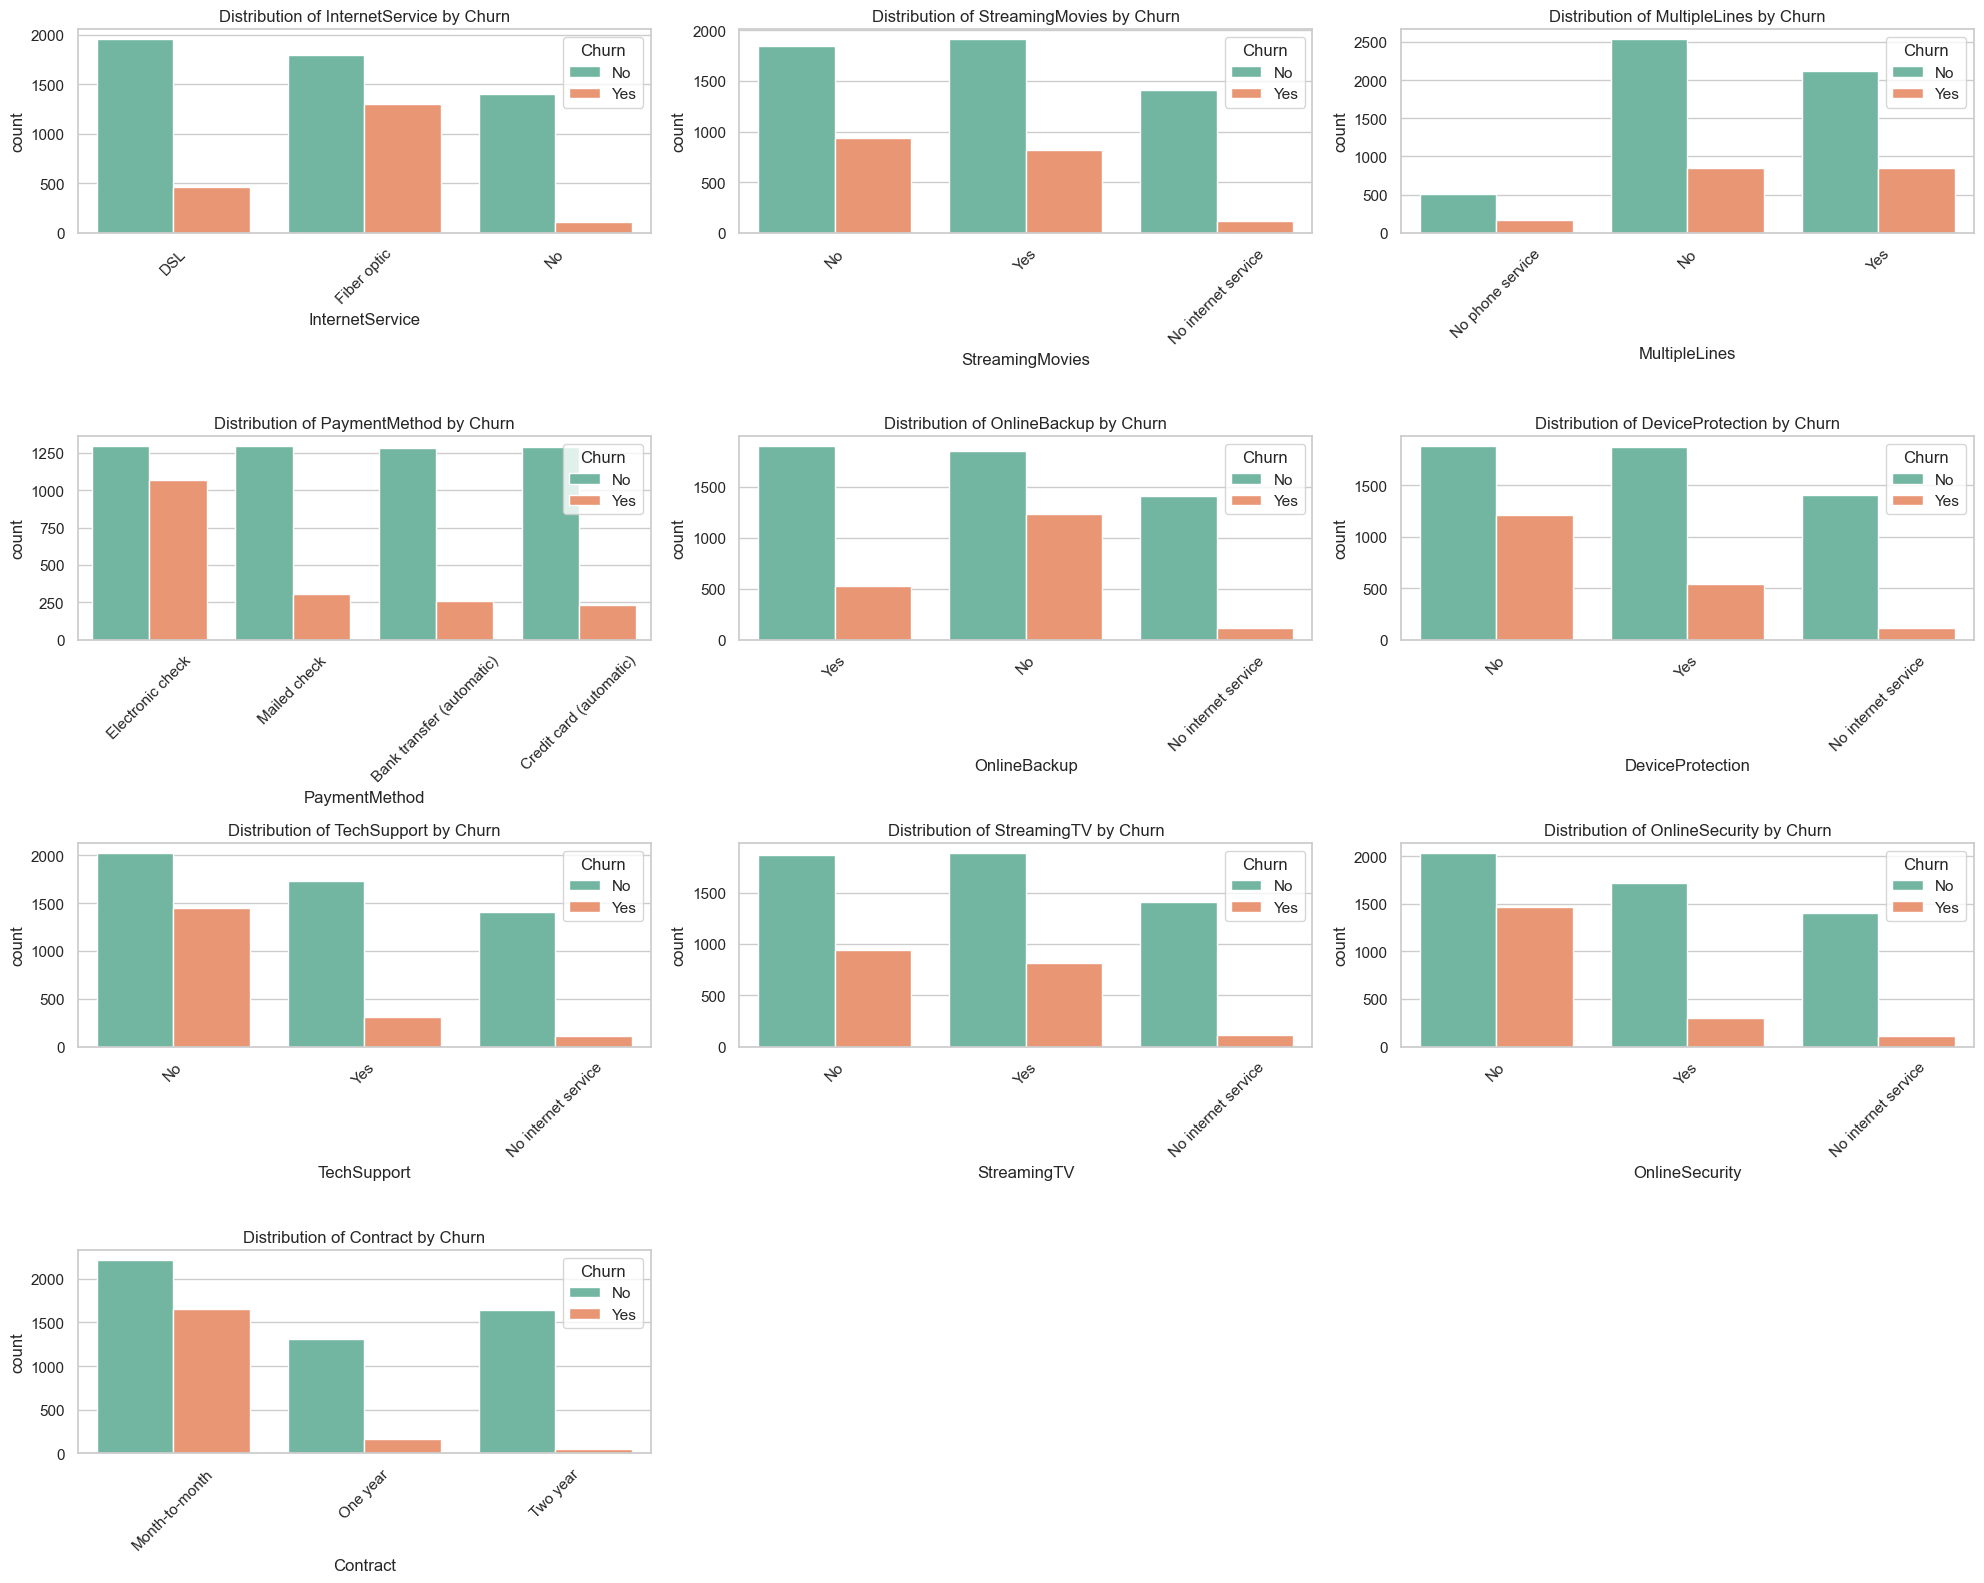

In [36]:
# Set layout for plotting all in one figure
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each categorical feature with 'Churn' as hue
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

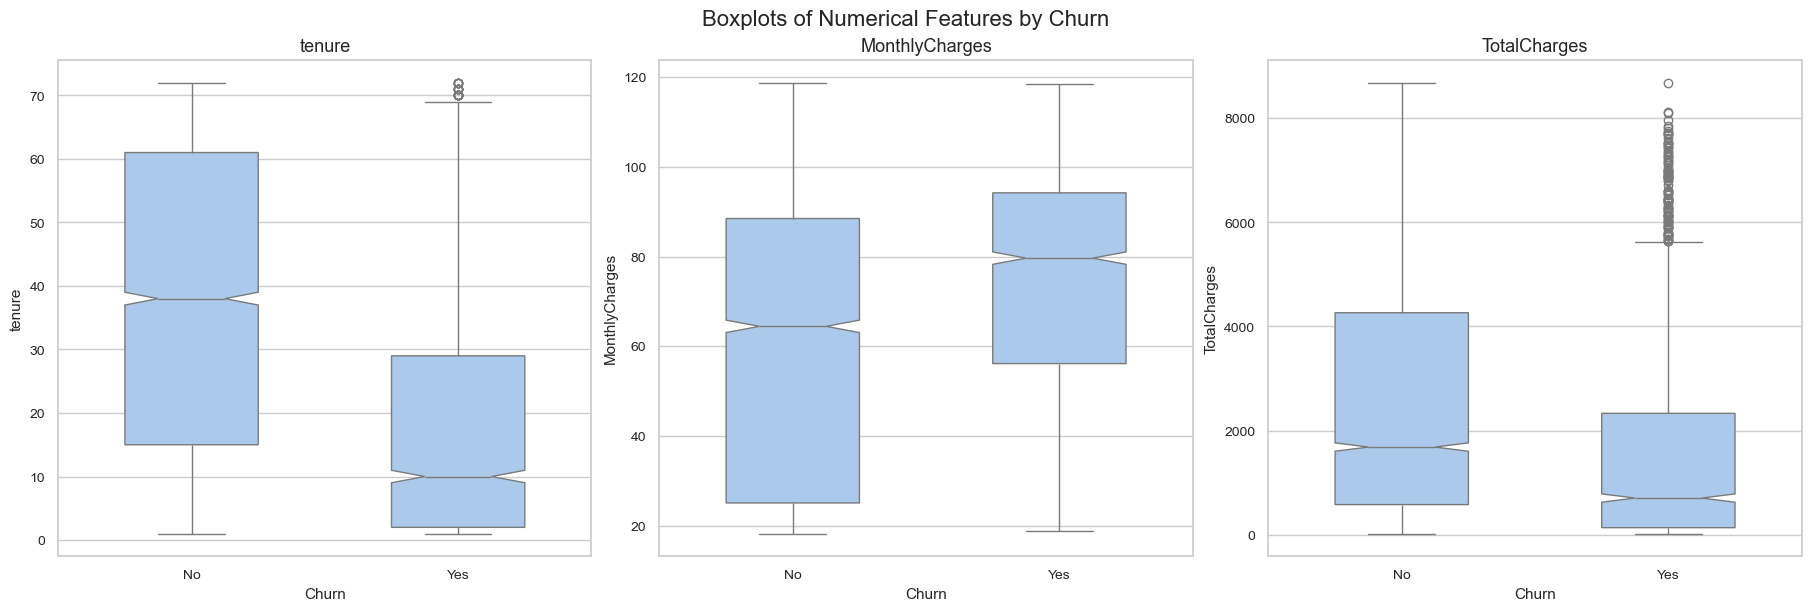

In [41]:
# Set theme
sns.set(style="whitegrid", palette="pastel")


# Create subplots
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6), constrained_layout=True)

# Loop over numeric features
for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, y=col, x='Churn', ax=axes[i], width=0.5, notch=True)
    axes[i].set_title(f"{col}", fontsize=13)
    axes[i].set_xlabel("Churn", fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].tick_params(labelsize=10)

# Add main title
fig.suptitle("Boxplots of Numerical Features by Churn", fontsize=16)

plt.show()

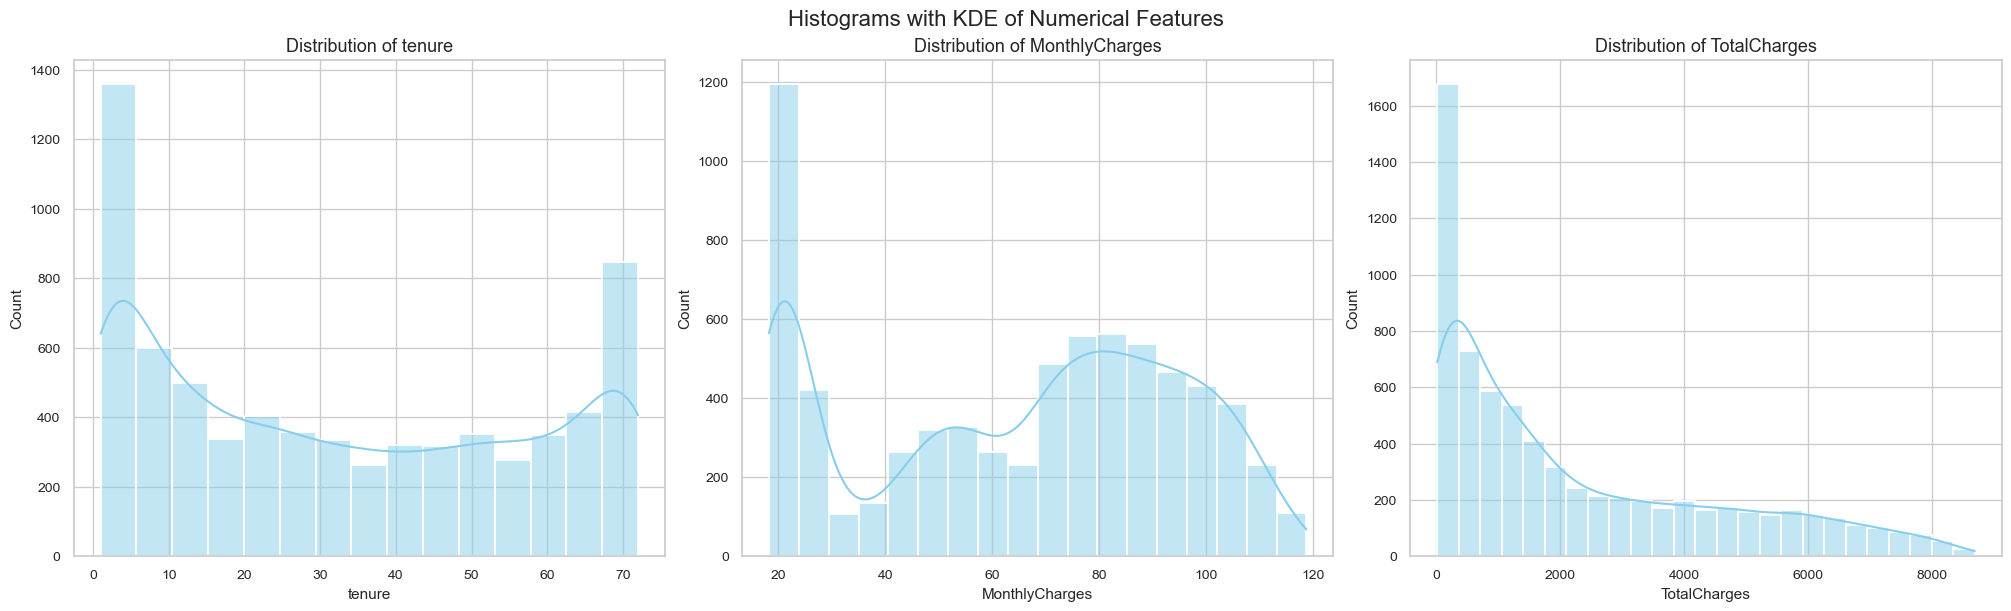

In [42]:
sns.set_theme(style="whitegrid", palette="pastel")  # Cleaner aesthetics

# Layout: one row, adjust to 2 rows if needed for readability
fig, axes = plt.subplots(1, len(numeric_features), figsize=(20, 6), constrained_layout=True)

for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", edgecolor="white", linewidth=1.3)
    axes[i].set_title(f"Distribution of {col}", fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Count", fontsize=11)
    axes[i].tick_params(labelsize=10)

fig.suptitle("Histograms with KDE of Numerical Features", fontsize=16)
plt.show()

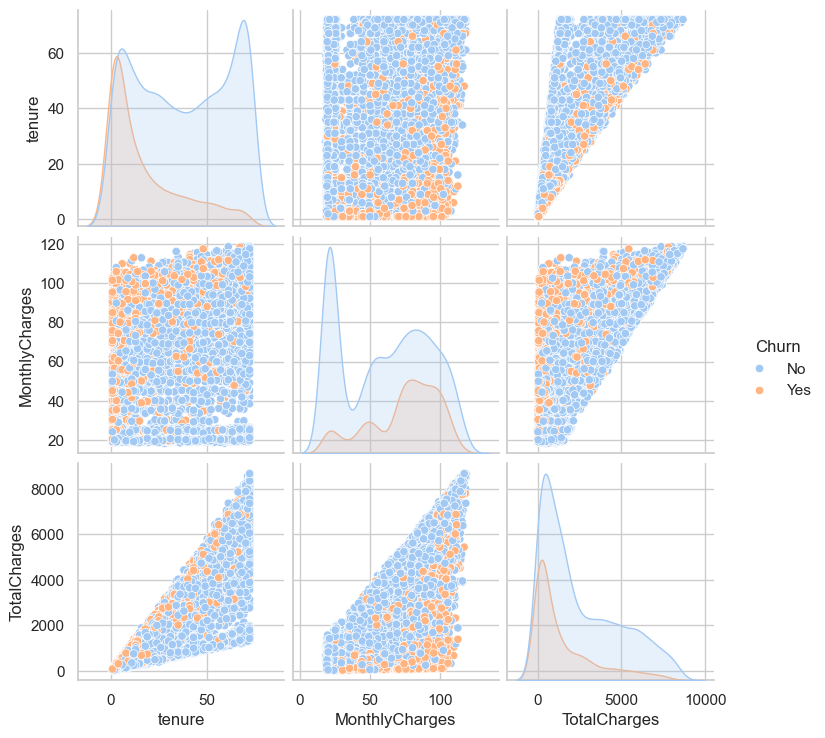

In [43]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')


<Axes: xlabel='Contract'>

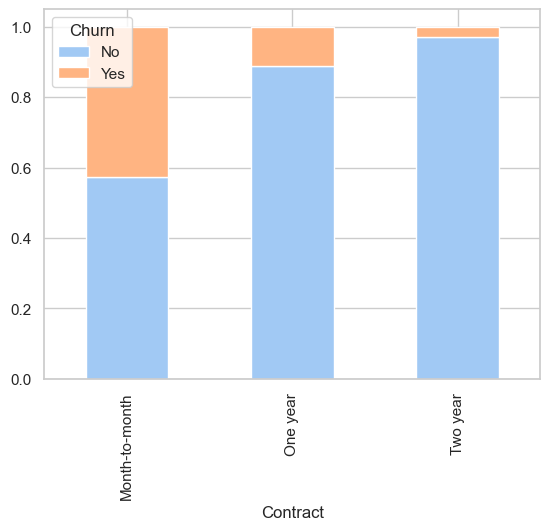

In [44]:
(df.groupby('Contract')['Churn']
   .value_counts(normalize=True)
   .unstack()
   .plot(kind='bar', stacked=True))